In [114]:
import pandas as pd
import openpyxl
from pandas import read_excel, DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from numpy.random import seed
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Загружаем исходные файлы
df1 = pd.read_excel('X_bp.xlsx')
df2 = pd.read_excel('X_nup.xlsx')

# Проверяем размерность каждого из файлов
print(f'Размерность первого файла: {df1.shape}')
print(f'Размерность второго файла: {df2.shape}')

# Объединяем два датафрейма в один методом INNER по индексам
merged_dataset = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)

# Устраняем строки без индексов и лишние столбцы
merged_dataset = merged_dataset.dropna()
merged_dataset.drop(['Unnamed: 0_x'], axis=1, inplace=True)
merged_dataset.drop(['Unnamed: 0_y'], axis=1, inplace=True)

# Сохраняем объединенный датафрейм в новый excel файл
merged_dataset.to_excel('merged.xlsx', index=False)

# Проверяем размерность объединенного файла
print(f'Размерность объединенного файла: {merged_dataset.shape}')

Размерность первого файла: (1023, 11)
Размерность второго файла: (1040, 4)
Размерность объединенного файла: (1023, 13)


Описательная статистика:
        Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%   

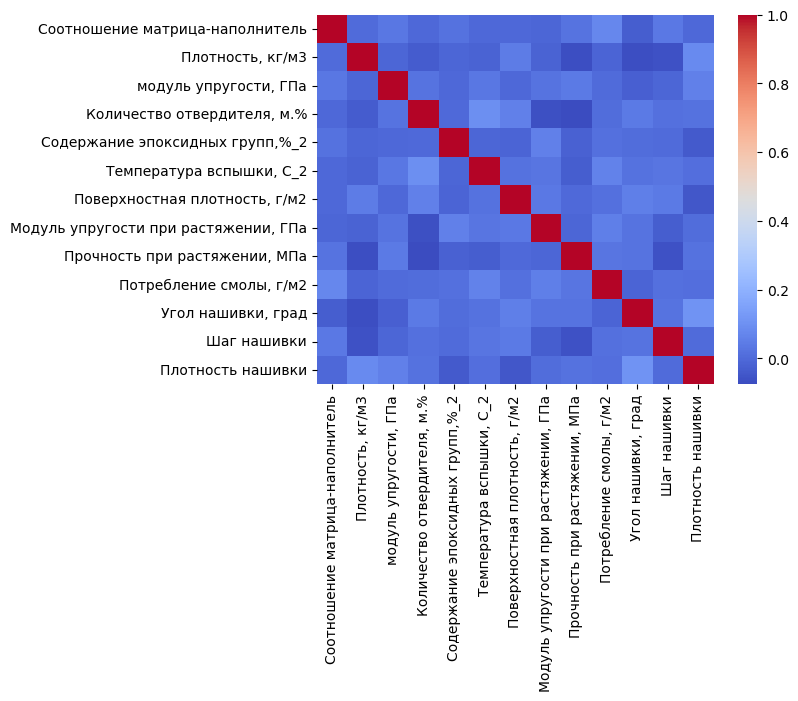

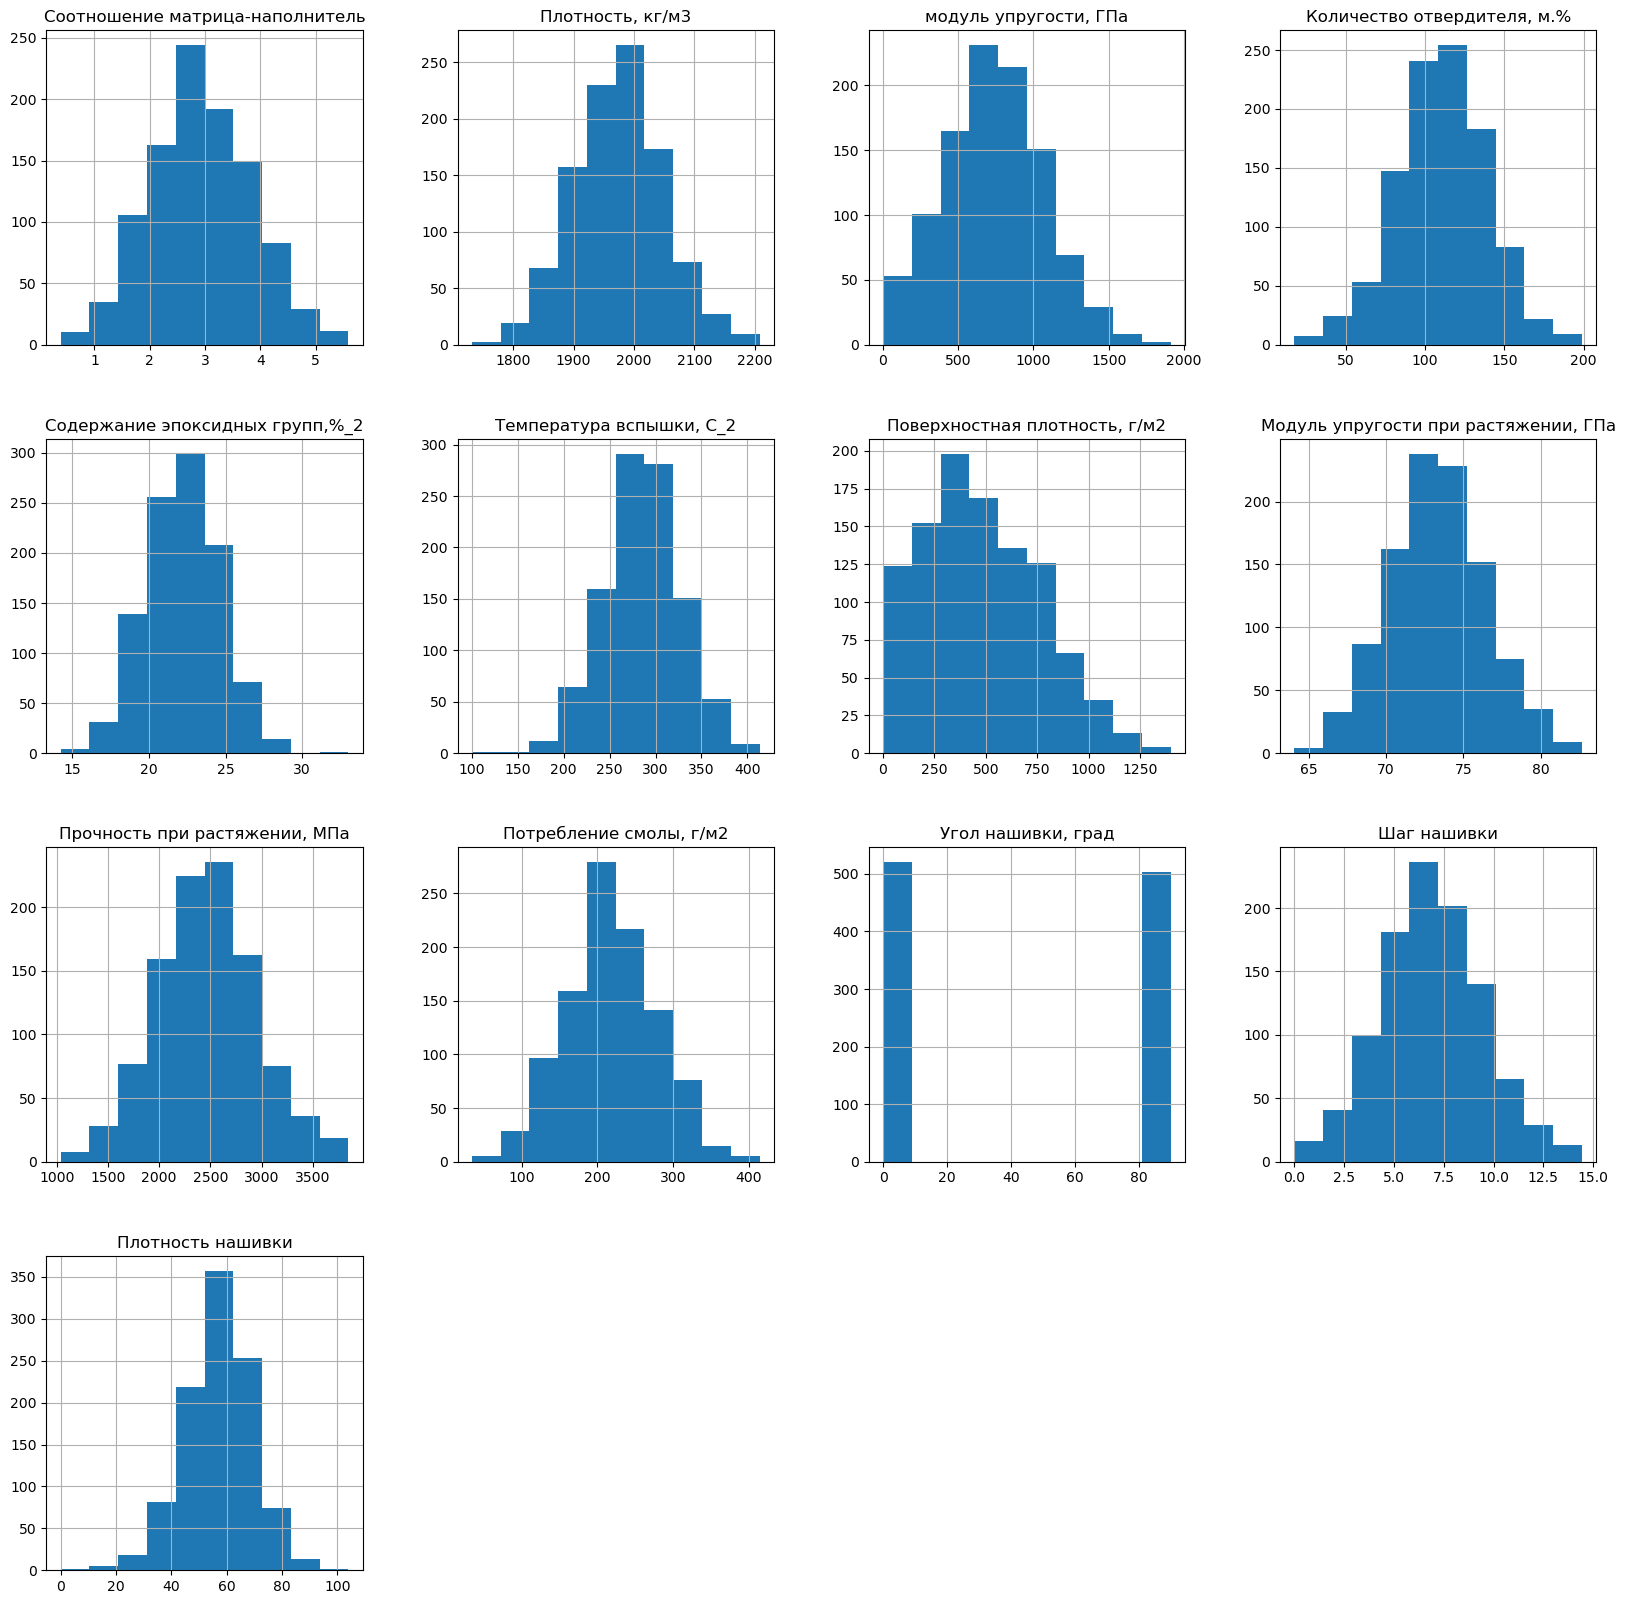

In [115]:
# описательная статистика
print('Описательная статистика:\n', merged_dataset.describe())
merged_dataset.info()

# количество уникальных значений по столбцам
print('Количество уникальных значений по столбцам:\n', merged_dataset.nunique())

# матрица корреляций
corr_matrix = merged_dataset.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# гистограммы для каждого столбца
merged_dataset.hist(figsize=(20, 20))
plt.show()

# удаление выбросов методом межквартильных растояний IQR
Q1 = merged_dataset.quantile(0.25)
Q3 = merged_dataset.quantile(0.75)
IQR = Q3 - Q1
merged_dataset = merged_dataset[~((merged_dataset < (Q1 - 1.5 * IQR)) |(merged_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

# Сохраняем объединенный датафрейм в новый excel файл
merged_dataset.to_excel('merged2.xlsx', index=False)


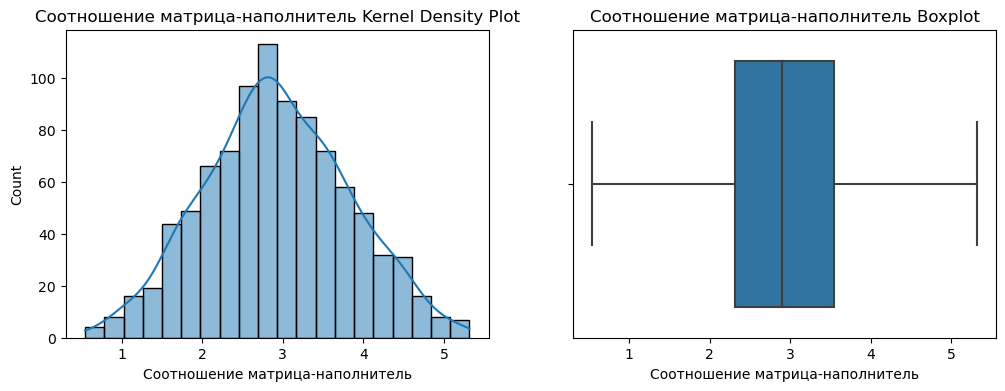

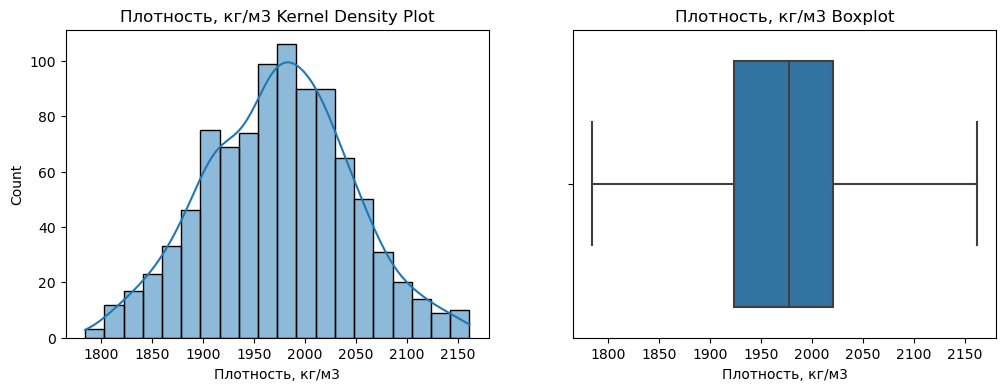

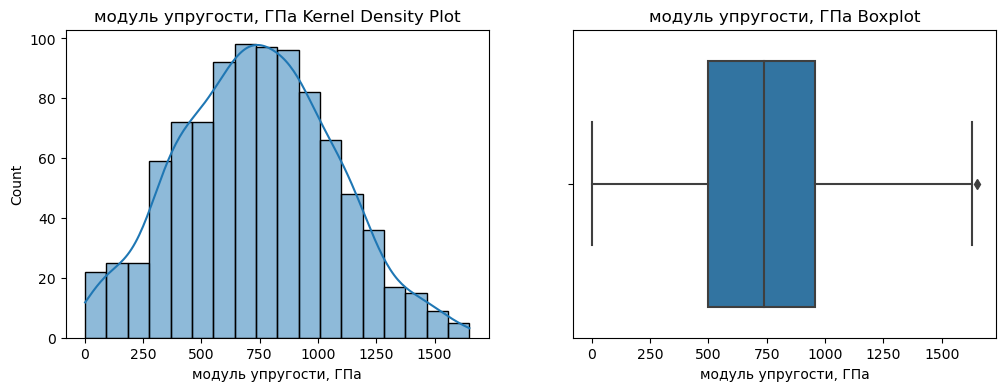

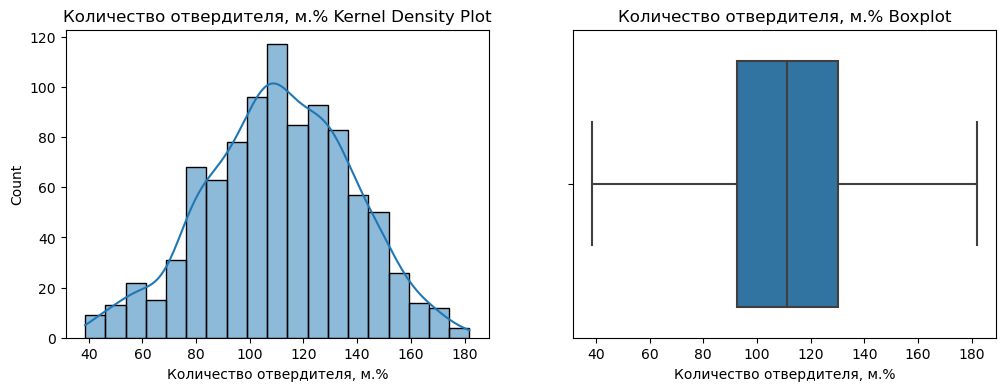

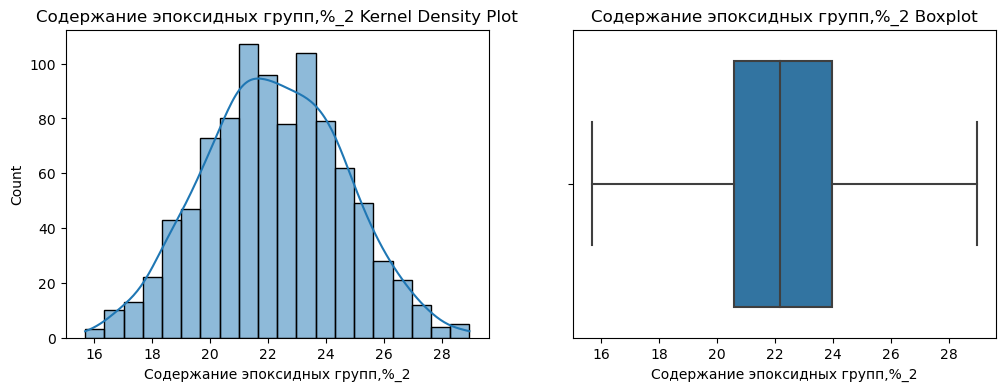

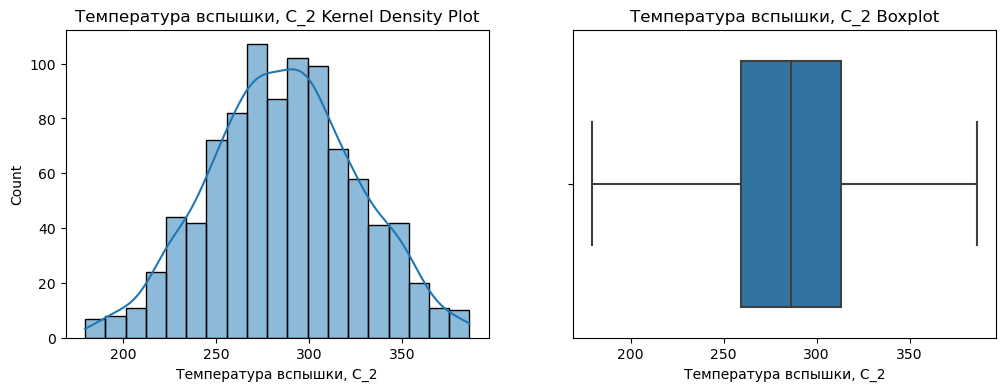

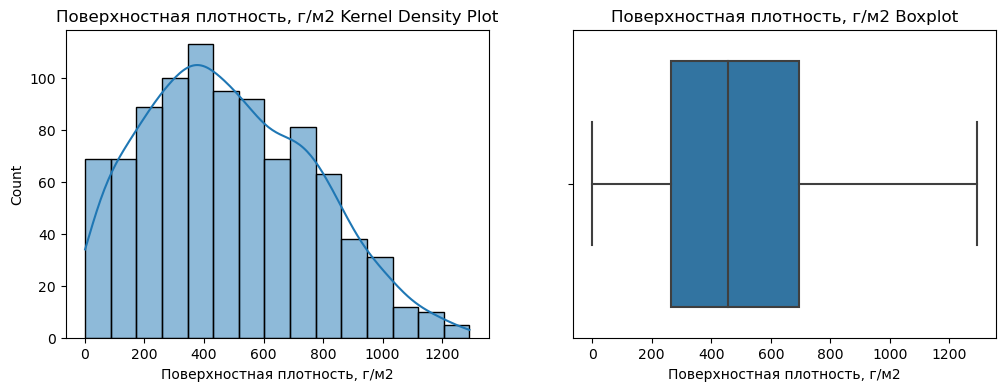

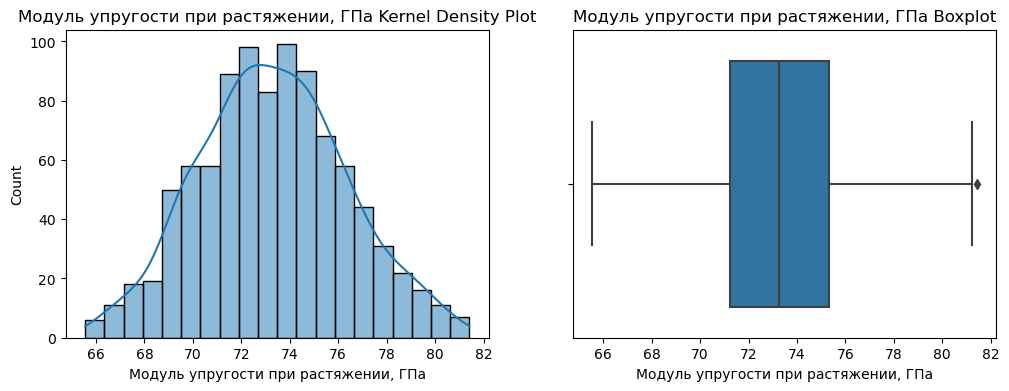

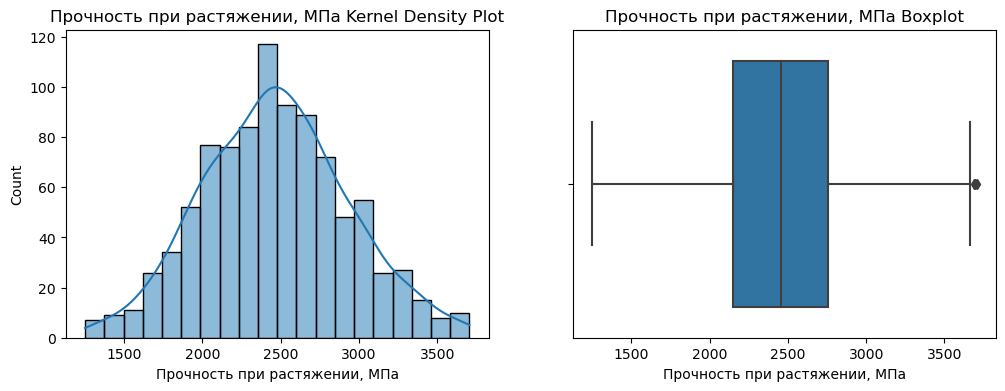

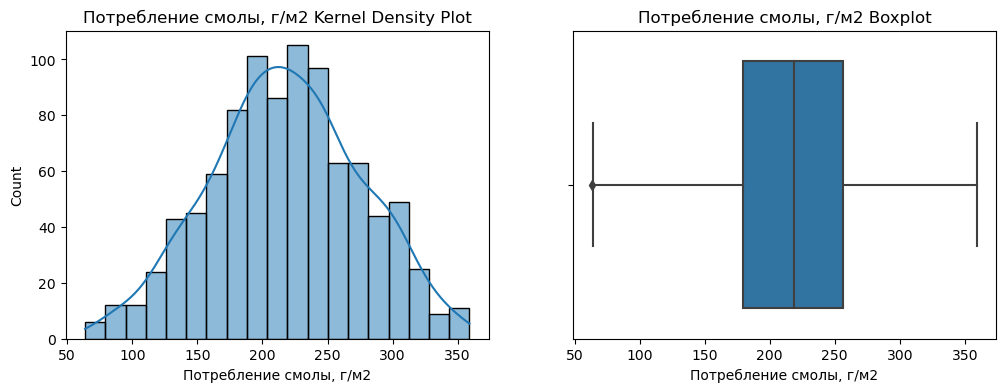

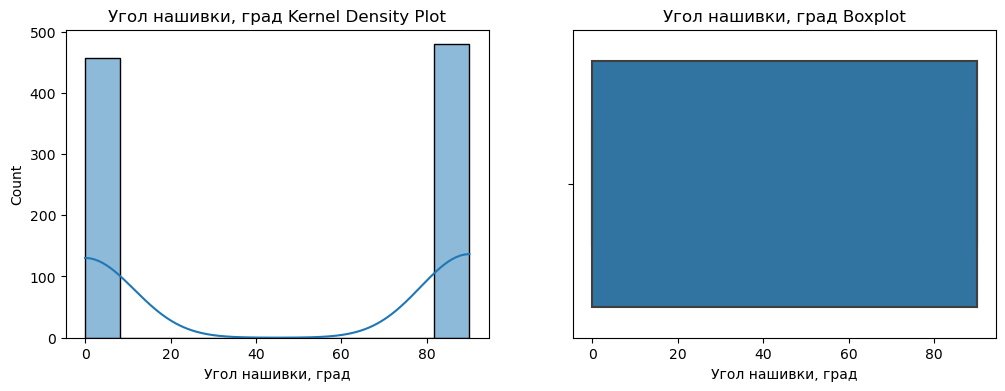

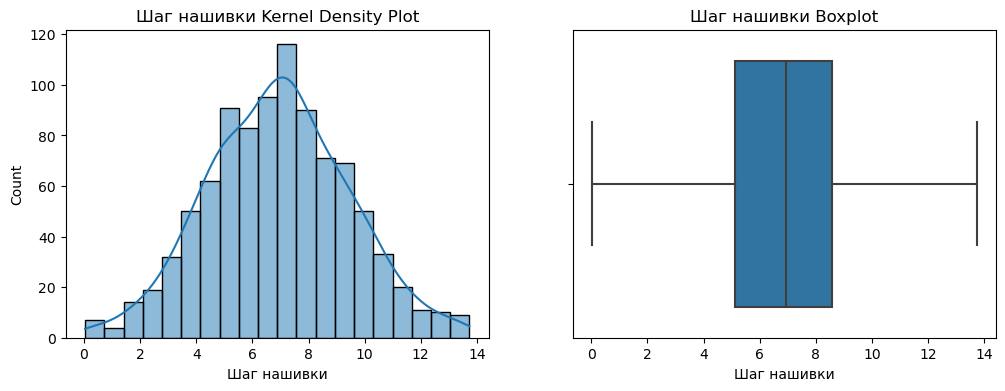

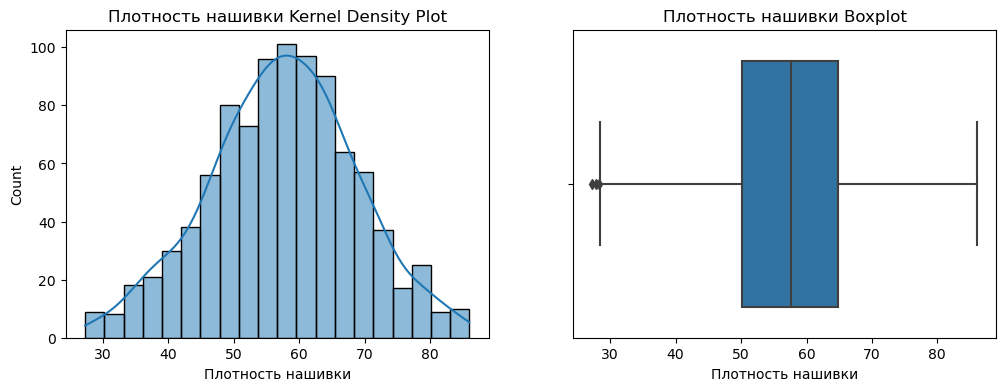

In [116]:
# выводим статистику по обработанному датасету
for col in merged_dataset.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data=merged_dataset, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=merged_dataset, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Kernel Density Plot")
    ax[1].set_title(f"{col} Boxplot")
    plt.show()

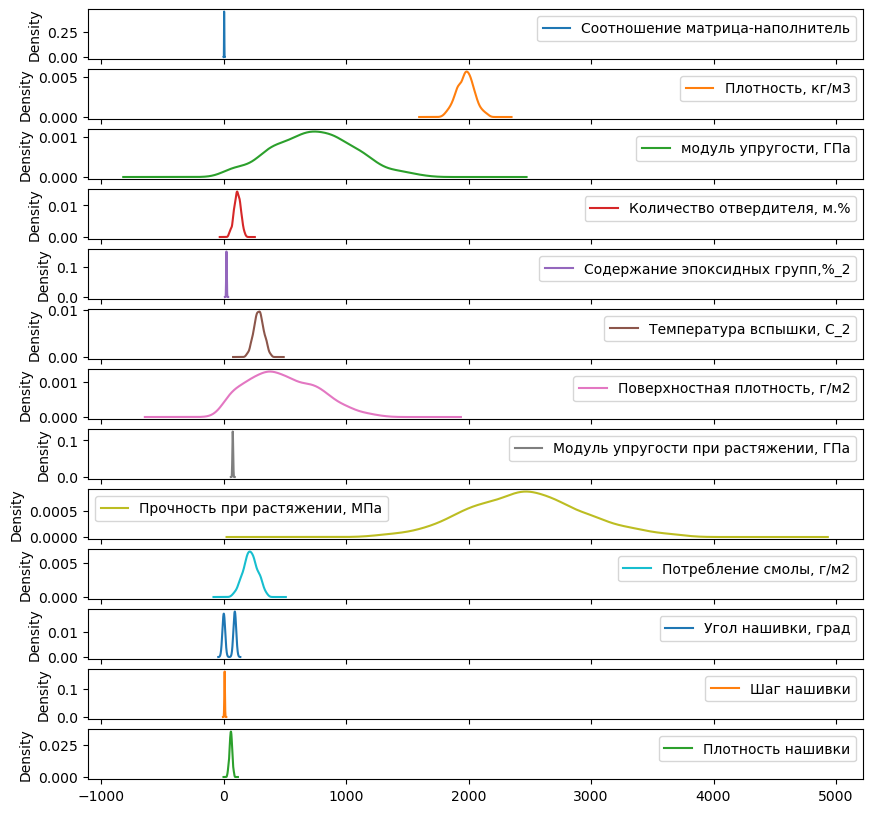

In [117]:
merged_dataset.plot.kde(subplots=True, figsize=(10,10))
plt.show()

Модуль упругости при растяжении:
R2 score: 0.8019187277530522
Mean Squared Error: 1.3454001285383927e-06
Прочность при растяжении:
R2 score: 0.9618970294024907
Mean Squared Error: 0.00022167676281968548


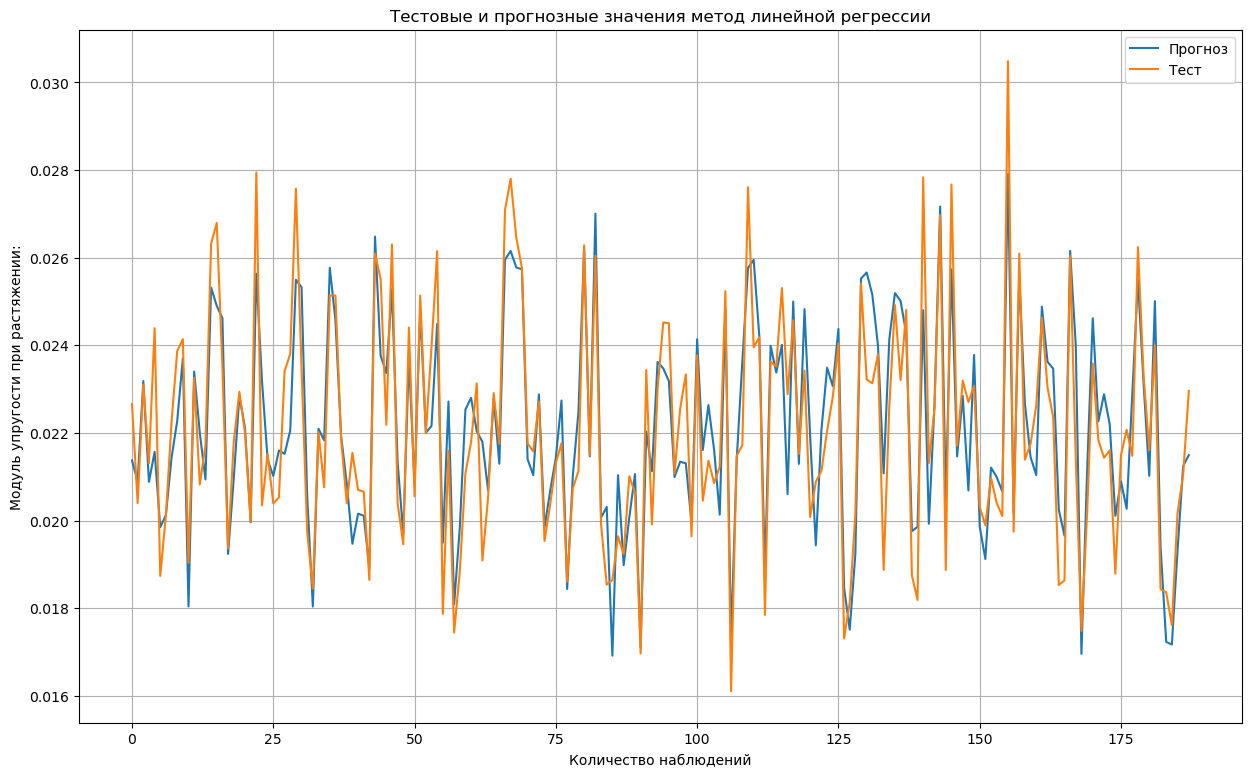

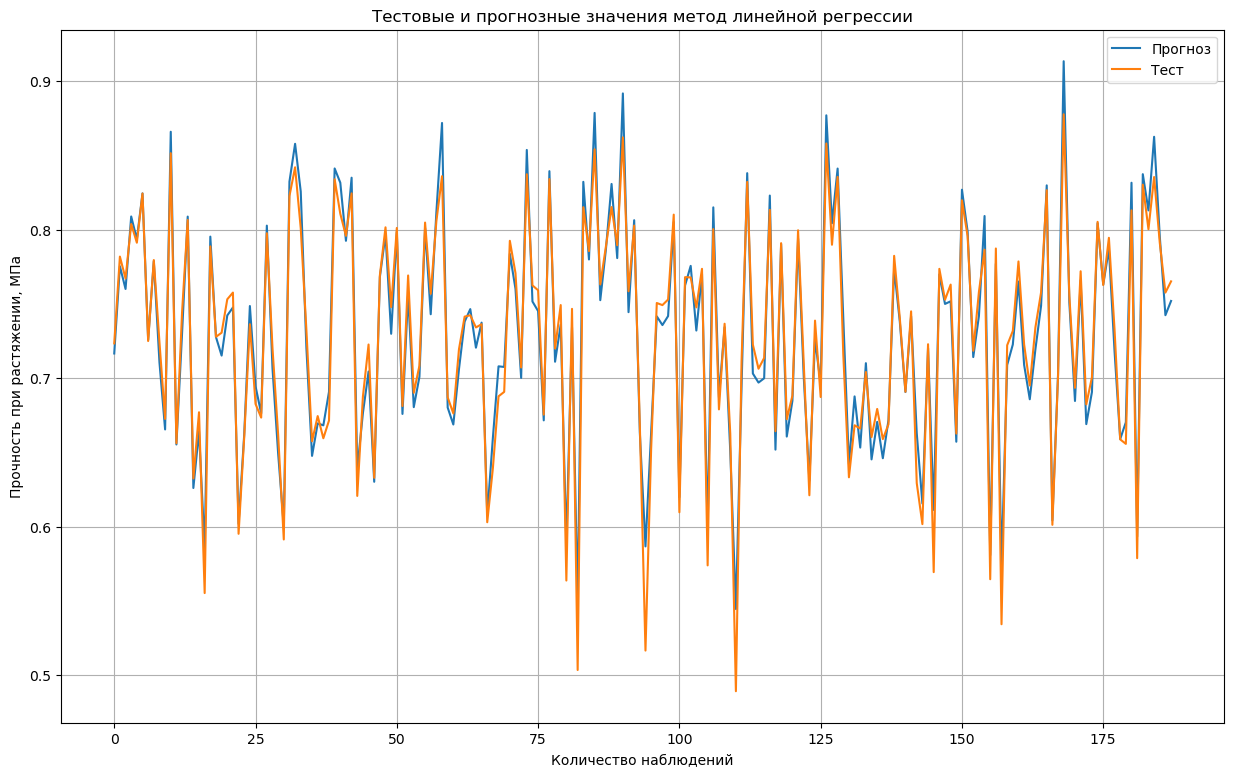

In [118]:
# метод линейной регрессии
# Загрузка данных
#Нормализация данных с помощью Normalizer()
normalizer = Normalizer()
res = normalizer.fit_transform(pd.read_excel("merged2.xlsx"))
data = pd.DataFrame(res, columns = pd.read_excel("merged2.xlsx").columns)

# Разделение датасета на целевые переменные и признаки
X = data.drop(["Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа"], axis=1)
y_modulus = data["Модуль упругости при растяжении, ГПа"]
y_strength = data["Прочность при растяжении, МПа"]

# Разделение датасета на тренировочную и тестовую выборки
X_train, X_test, y_train_modulus, y_test_modulus, y_train_strength, y_test_strength = train_test_split(X, y_modulus, y_strength, test_size=0.2)

# Создание и обучение модели для модуля упругости
model_modulus = LinearRegression()
model_modulus.fit(X_train, y_train_modulus)

# Создание и обучение модели для прочности
model_strength = LinearRegression()
model_strength.fit(X_train, y_train_strength)

# Предсказание значений на тестовой выборке
y_pred_modulus = model_modulus.predict(X_test)
y_pred_strength = model_strength.predict(X_test)

# Оценка точности модели с помощью метрики R-квадрат
r2_modulus = r2_score(y_test_modulus, y_pred_modulus)
r2_strength = r2_score(y_test_strength, y_pred_strength)
mse_strength = mean_squared_error(y_test_strength, y_pred_strength)
mse_modulus = mean_squared_error(y_test_modulus, y_pred_modulus)

# Вывод результатов
print("Модуль упругости при растяжении:")
print(f"R2 score: {r2_modulus}")
print(f"Mean Squared Error: {mse_modulus}")

print("Прочность при растяжении:")
print(f"R2 score: {r2_strength}")
print(f"Mean Squared Error: {mse_strength}")

plt.figure(figsize = (15, 9))
plt.title("Тестовые и прогнозные значения метод линейной регрессии")
plt.plot(y_pred_modulus, label = "Прогноз")
plt.plot(y_test_modulus.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении:")
plt.legend()
plt.grid(True);

plt.figure(figsize = (15, 9))
plt.title("Тестовые и прогнозные значения метод линейной регрессии")
plt.plot(y_pred_strength, label = "Прогноз")
plt.plot(y_test_strength.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

Модуль упругости при растяжении:
R2 score: 0.7788908229256346
Mean Squared Error: 1.4032163349029491e-06
Прочность при растяжении:
R2 score: 0.9773001305775134
Mean Squared Error: 0.00011546706807604926


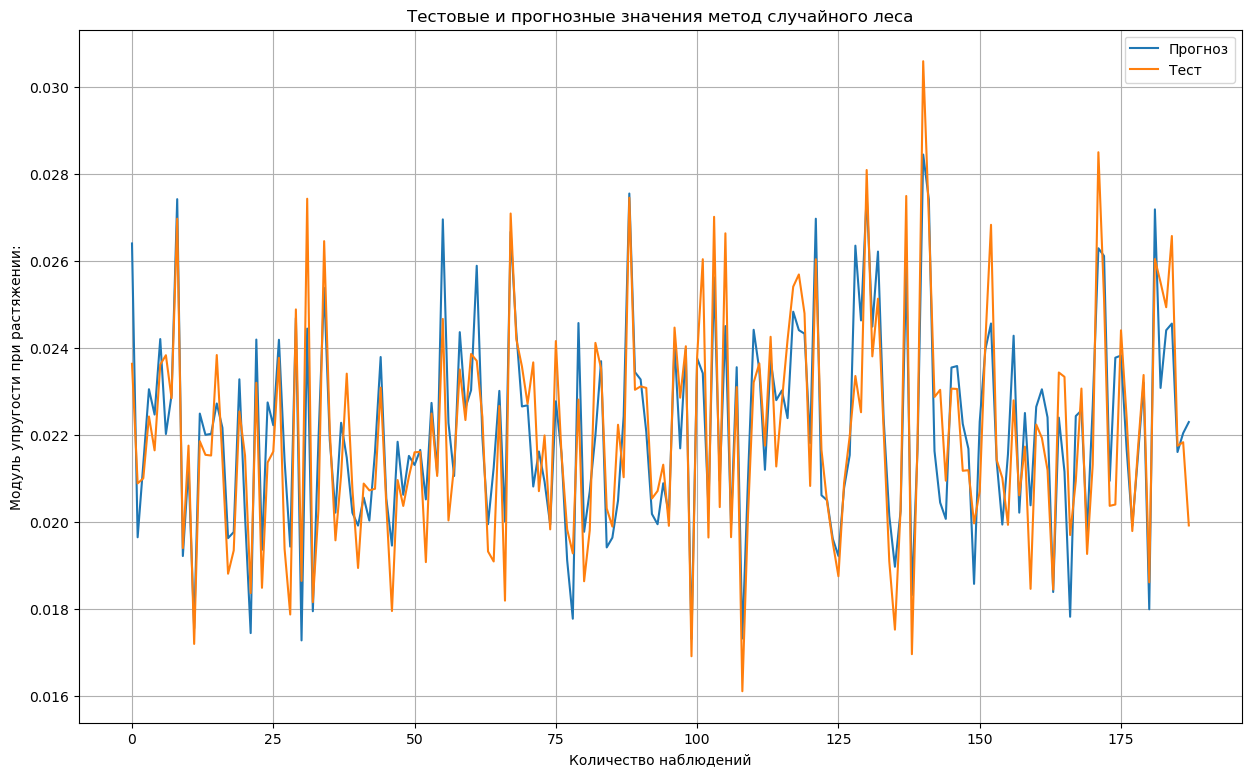

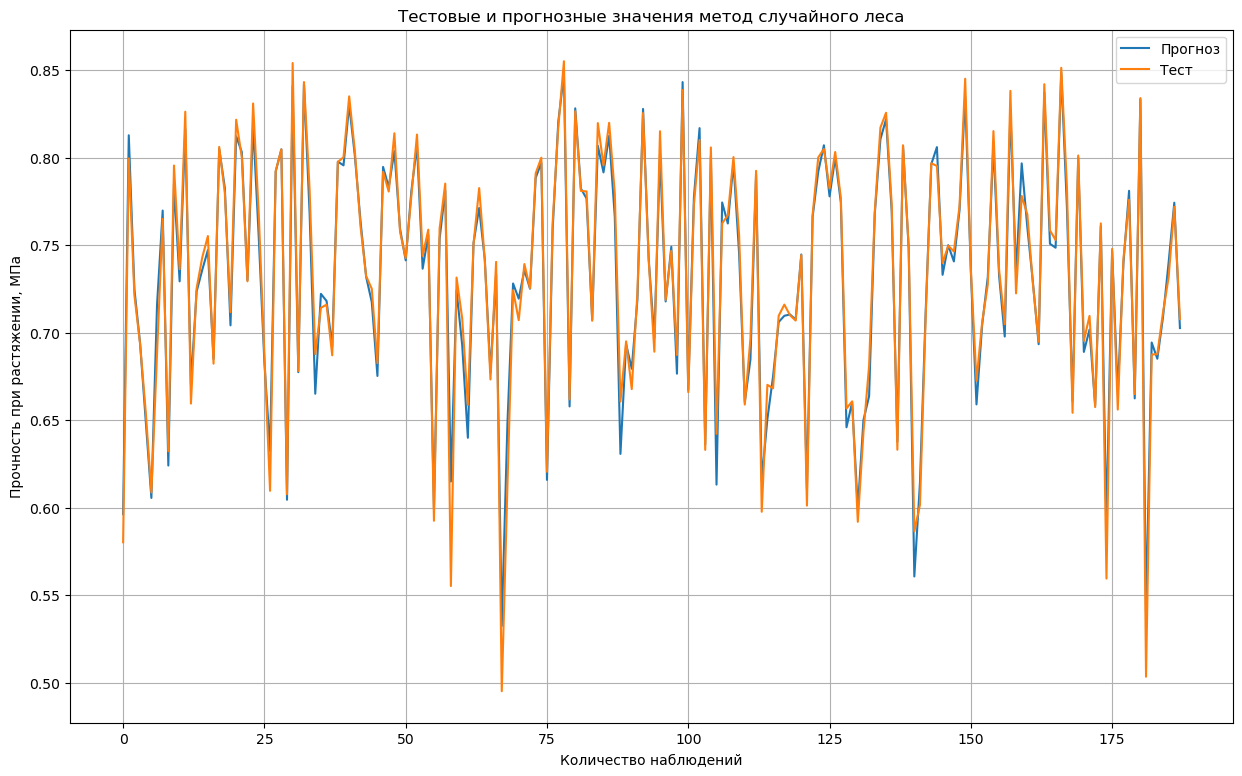

In [119]:
# метод случайного леса
#Нормализация данных с помощью Normalizer()
normalizer = Normalizer()
res = normalizer.fit_transform(pd.read_excel("merged2.xlsx"))
data = pd.DataFrame(res, columns = pd.read_excel("merged2.xlsx").columns)

# Разделение датасета на целевые переменные и признаки
X = data.drop(["Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа"], axis=1)
y_modulus = data["Модуль упругости при растяжении, ГПа"]
y_strength = data["Прочность при растяжении, МПа"]

# Разделение датасета на тренировочную и тестовую выборки
X_train, X_test, y_train_modulus, y_test_modulus, y_train_strength, y_test_strength = train_test_split(X, y_modulus, y_strength, test_size=0.2)

# Создание и обучение модели для модуля упругости
rf_modulus = RandomForestRegressor(random_state=920)
rf_modulus.fit(X_train, y_train_modulus)

# Предсказание модуля упругости
y_pred_modulus = rf_modulus.predict(X_test)

# Оценка точности предсказаний модуля упругости
r2_modulus = r2_score(y_test_modulus, y_pred_modulus)
mse_modulus = mean_squared_error(y_test_modulus, y_pred_modulus)

# Создание и обучение модели для прочности
rf_strength = RandomForestRegressor(random_state=92)
rf_strength.fit(X_train, y_train_strength)

# Предсказание прочности
y_pred_strength = rf_strength.predict(X_test)

# Оценка точности предсказаний прочности
r2_strength = r2_score(y_test_strength, y_pred_strength)
mse_strength = mean_squared_error(y_test_strength, y_pred_strength)

# Вывод результатов
print("Модуль упругости при растяжении:")
print(f"R2 score: {r2_modulus}")
print(f"Mean Squared Error: {mse_modulus}")

print("Прочность при растяжении:")
print(f"R2 score: {r2_strength}")
print(f"Mean Squared Error: {mse_strength}")

plt.figure(figsize = (15, 9))
plt.title("Тестовые и прогнозные значения метод случайного леса")
plt.plot(y_pred_modulus, label = "Прогноз")
plt.plot(y_test_modulus.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Модуль упругости при растяжении:")
plt.legend()
plt.grid(True);

plt.figure(figsize = (15, 9))
plt.title("Тестовые и прогнозные значения метод случайного леса")
plt.plot(y_pred_strength, label = "Прогноз")
plt.plot(y_test_strength.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Прочность при растяжении, МПа")
plt.legend()
plt.grid(True);

Epoch 1/44
2/2 [==============================] - 1s 317ms/step - loss: 0.0011 - val_loss: 2.3850e-04
Epoch 2/44
2/2 [==============================] - 0s 82ms/step - loss: 2.0490e-04 - val_loss: 3.9488e-04
Epoch 3/44
2/2 [==============================] - 0s 82ms/step - loss: 3.6042e-04 - val_loss: 6.1724e-05
Epoch 4/44
2/2 [==============================] - 0s 84ms/step - loss: 4.5978e-05 - val_loss: 1.0699e-04
Epoch 5/44
2/2 [==============================] - 0s 84ms/step - loss: 1.2231e-04 - val_loss: 1.1923e-04
Epoch 6/44
2/2 [==============================] - 0s 81ms/step - loss: 9.7170e-05 - val_loss: 8.5431e-06
Epoch 7/44
2/2 [==============================] - 0s 82ms/step - loss: 7.3250e-06 - val_loss: 2.9640e-05
Epoch 8/44
2/2 [==============================] - 0s 82ms/step - loss: 3.7276e-05 - val_loss: 5.4788e-05
Epoch 9/44
2/2 [==============================] - 0s 84ms/step - loss: 5.0633e-05 - val_loss: 1.7888e-05
Epoch 10/44
2/2 [==============================] - 0s 82ms

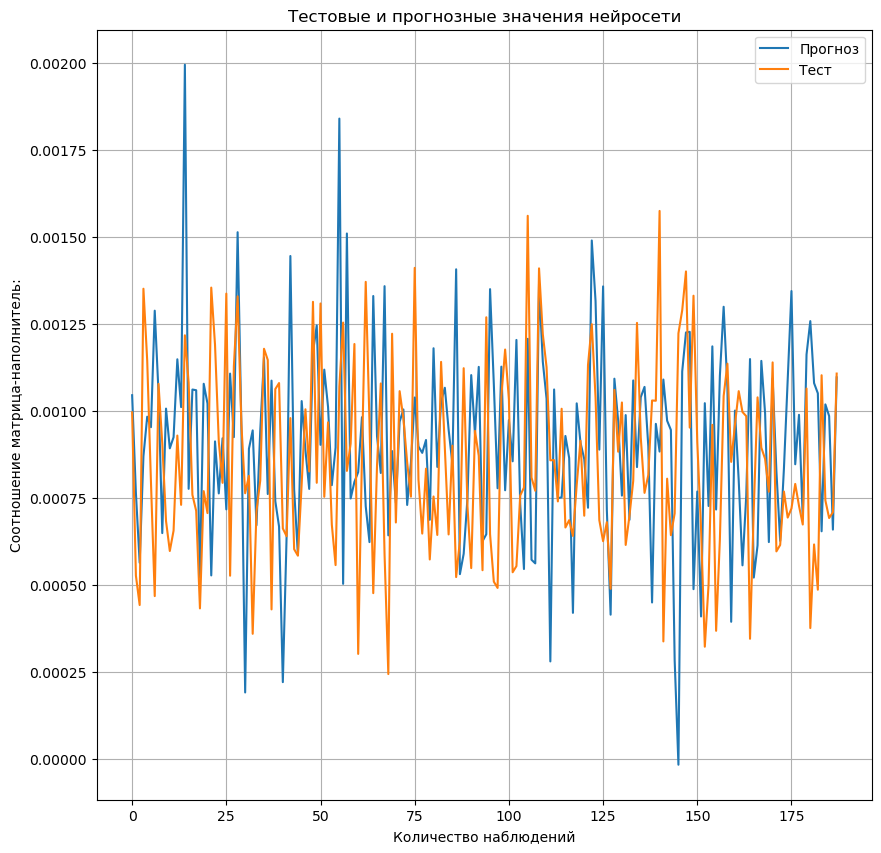

In [180]:
# создание нейронной сети для прогнозирования наполнитель-база
# Загрузка датасета из файла excel
normalizer = Normalizer()
res = normalizer.fit_transform(pd.read_excel("merged2.xlsx"))
data = pd.DataFrame(res, columns = pd.read_excel("merged2.xlsx").columns)

# Разделение датасета на целевую переменную и признаки
y = data['Соотношение матрица-наполнитель']
X = data.drop(['Соотношение матрица-наполнитель'], axis=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Компиляция модели
model.compile(optimizer='adam',
              loss='mse')

# Обучение модели
model.fit(X_train, y_train, epochs=44, batch_size=512, validation_data=(X_test, y_test))

# Оценка точности предсказания
score = model.evaluate(X_test, y_test)
print("Mean squared error on test set:", score)

y_pred_model = model.predict(X_test.values)
plt.figure(figsize = (10, 10))
plt.title("Тестовые и прогнозные значения нейросети")
plt.plot(y_pred_model, label = "Прогноз")
plt.plot(y_test.values, label = "Тест")
plt.xlabel("Количество наблюдений")
plt.ylabel("Соотношение матрица-наполнитель:")
plt.legend()
plt.grid(True);

In [181]:
# Сохранение обученной модели
model.save('my_model')

# Загрузка модели
loaded_model = tf.keras.models.load_model('my_model')

# Использование модели для предсказания параметров
new_params = pd.DataFrame({'Плотность, кг/м3': [2030],'Модуль упругости, ГПа': [738],'Количество отвердителя, м.%': [50],'Содержание эпоксидных групп,%_2': [23],'Температура вспышки, С_2': [284],'Поверхностная плотность, г/м2': [210],'Модуль упругости при растяжении, ГПа': [70],'Прочность при растяжении, МПа': [3000],'Потребление смолы, г/м2': [220],'Угол нашивки, град': [90],'Шаг нашивки': [4],'Плотность нашивки': [60]})
prediction = loaded_model.predict(new_params)
print(f'Предсказание соотношения матрица-наполнитель: {prediction[0]}')

INFO:tensorflow:Assets written to: my_model\assets
1/1 [==============================] - 0s 81ms/step
Предсказание соотношения матрица-наполнитель: [11.66012]
